# Assignment 3 - Building a Custom Visualization

---

### Assignment Description

Four sets of randomly generated normal distributions are given.  The objective is to plot four bar charts using matplotlib.pyplot with their respective confidence intervals. Then an interactive feature to allow a user to choose a Y value by clicking the canvas was implemented.  A user-click generatea an event.  Receiving the mouth event, the plot should generate a horizontal line at the given Y value.  If the Y value was to lie below the confidence interval of a given bar, the bar should turn blue.  If it was above, the bar should be colored grey. If it was contained within the confidence interbal, the bar should turn red (The easiest option is implemented).
<br>
#### Coursera Course: Applied Plotting, Charting, and Data Representation from University of Michigan
#### Session: 2/5/2018 - 3/11/2018

In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import scipy
import scipy.stats as sp
import matplotlib.pyplot as plt

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
# leave the original dataframe as is
sampled = df
sampled.iloc[:, :10]

,0,1,2,3,4,5,6,7,8,9
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367


In [3]:
# Calculate the mean for each row and store the data in a new column
sampled['mean_val'] = sampled.mean(axis=1)
sampled['mean_val']

1992    33312.107476
1993    41861.859541
1994    39493.304941
1995    47743.550969
Name: mean_val, dtype: float64

In [4]:
# Calculate the standard error for each row and store it in a new column
sampled['std_err'] = sampled.apply(scipy.stats.sem, axis=1)
sampled['std_err']

1992    3319.956609
1993    1628.255022
1994    2322.783068
1995    1154.709998
Name: std_err, dtype: float64

In [5]:
# Calculate the margin of error for each row and store it is a new column
sampled['me_95'] = 1.96*sampled['std_err']
sampled['me_95']

1992    6507.114954
1993    3191.379843
1994    4552.654813
1995    2263.231596
Name: me_95, dtype: float64

In [6]:
# calculate the lower bound of the confidence interval  for each row and store it in a new column
sampled['ci_low'] = sampled['mean_val'] - sampled['me_95']
sampled['ci_low']

1992    26804.992521
1993    38670.479698
1994    34940.650128
1995    45480.319373
Name: ci_low, dtype: float64

In [7]:
# calculate the upper bound of the confidence interval  for each row and store it in a new column
sampled['ci_high'] = sampled['mean_val'] + sampled['me_95']
sampled['ci_high']

1992    39819.222430
1993    45053.239384
1994    44045.959755
1995    50006.782565
Name: ci_high, dtype: float64

In [8]:
me = list(sampled['me_95'])
me

[6507.1149544677628, 3191.379843240165, 4552.6548134894074, 2263.2315958959716]

In [9]:
mv = list(sampled['mean_val'])
mv

[33312.107475544333,
 41861.859541073391,
 39493.304941398899,
 47743.550969267133]

<IPython.core.display.Javascript object>


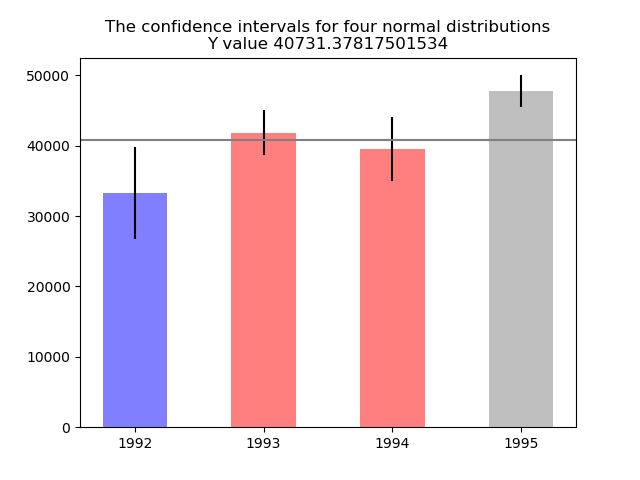

8

In [15]:
%matplotlib notebook

# use these parameters for plotting
n_groups = 4
fig,ax = plt.subplots()
bar_width =.5

# A Static graph
plt.xticks([group for group in np.arange(n_groups)], ['1992', '1993', '1994', '1995'])
plt.bar(np.arange(n_groups), mv, bar_width, alpha=.5, color='b', yerr=me)

def onclick(event):    
    colours = [] # to store colors
    
    for i, row in sampled.iterrows():
        if row['ci_low'] > event.ydata: # the horizontal line is below the lower CI
            c = 'gray'
            colours.append(c)
        if (row['ci_low'] < event.ydata) & (row['ci_high'] > event.ydata): # within the CI
            c = 'red'
            colours.append(c)
        if row['ci_high'] < event.ydata: # the horizontal line is avove the upper bound of CI
            c = 'blue'
            colours.append(c)
    
    # Plot bars
    plt.cla() 
    plt.xticks([group for group in np.arange(n_groups)], ['1992', '1993', '1994', '1995'])
    plt.bar(np.arange(n_groups), mv, bar_width, alpha=.5, color=colours, yerr=me)
    plt.gca().set_title('The confidence intervals for four normal distributions\nY value {}'.format(event.ydata))
    
    # plot a line
    plt.axhline(y=event.ydata, color='gray', linestyle='-')

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)
 

In [16]:
plt.savefig('Assignment3.png')   